# credit card fraud detection on kaggle data set
The data set has 31 features, 28 of which have been anonymized and are labeled V1 through V28. The remaining
three features are the time and the amount of the transaction as well as whether that transaction was fraudulent or not

In [1]:
#importing packages
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
import zipfile

zf = zipfile.ZipFile(r'E:\ML\creditcardfraud.zip') 
df = pd.read_csv(zf.open('creditcard.csv'))


In [4]:
#shape
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [5]:
# head data 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


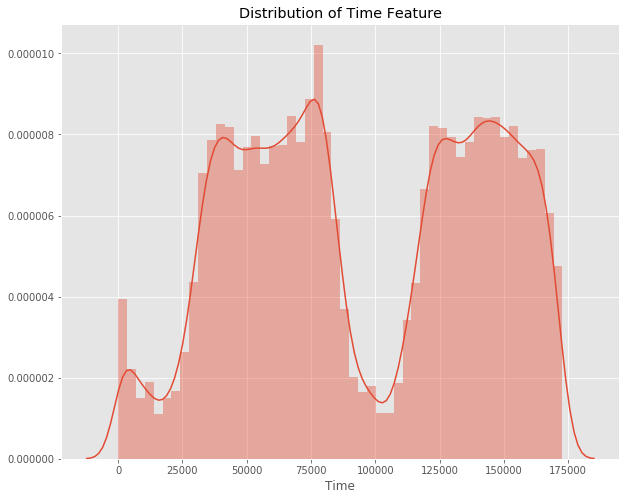

In [8]:
#visualizations of time 
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

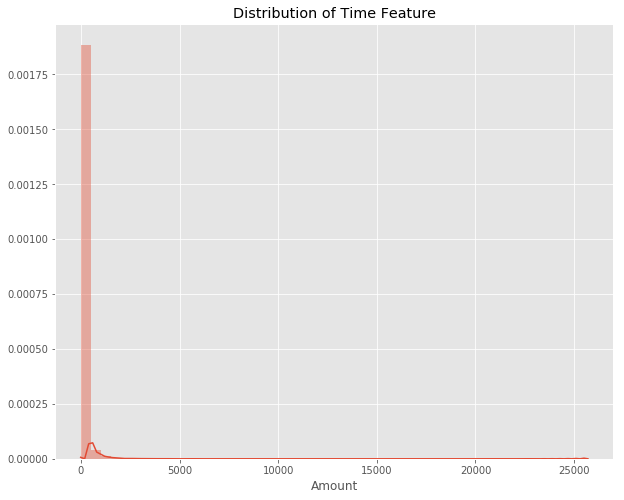

In [9]:
#visualizations of time 
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Amount)

Around 88 dollars is the mean of all credit card transactions in this data set. 
The biggest transaction had a monetary value of around 25,691 dollars.

In [10]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal,  \
                                                            perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

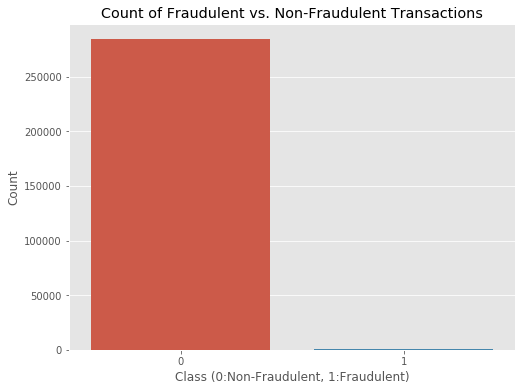

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [12]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,...,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,...,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,...,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,...,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,...,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,...,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,...,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,...,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,...,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


Finally, it would be interesting to know if there are any significant correlations between our predictors, 
especially with regards to our class variable. One of the most visually appealing ways to determine that is by using a heatmap.

Text(0.5, 1.0, 'Heatmap of Correlation')

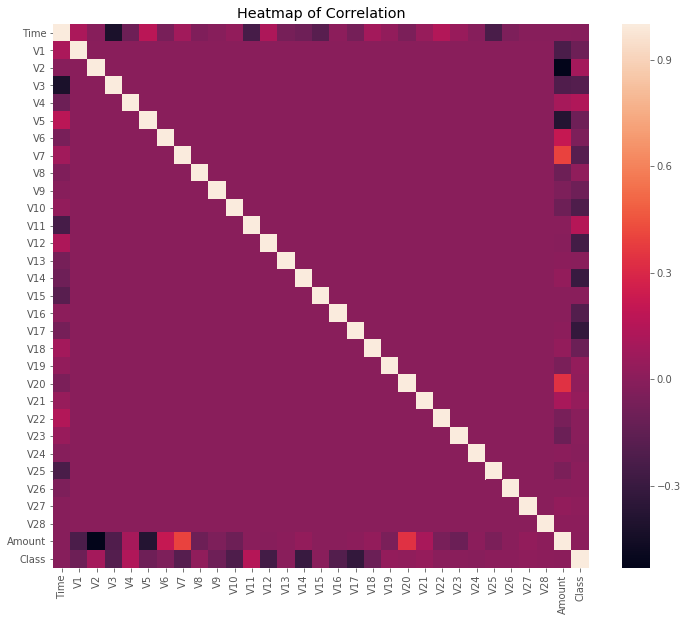

In [13]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [14]:
#skewness
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

# Scaling Amount and Time
anonymized features have been scaled and seem to be centered around zero, our time and amount features have not. 
Not scaling them as well would result in certain machine learning algorithms that give weights to features 
(logistic regression) or rely on a distance measure (KNN) performing much worse. To avoid this issue,
I standardized both the time and amount column

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [16]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [17]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
102473,68218.0,-1.556,1.873,0.319,0.065,-0.704,-1.117e+00,0.022,0.782,-0.369,...,0.082,0.334,-0.013,0.085,0.231,0.061,17.99,0,-0.281,-0.560
14904,26192.0,1.254,0.225,0.287,0.449,-0.008,-2.264e-01,0.005,-0.062,0.004,...,0.099,-0.418,0.227,0.154,-0.010,0.011,1.29,0,-0.348,-1.445
199906,133192.0,1.995,-0.383,-0.387,0.346,-0.409,6.789e-04,-0.640,-0.001,1.072,...,0.175,0.694,-0.219,0.541,-0.013,-0.038,11.50,0,-0.307,0.808
198877,132692.0,1.891,-0.213,-1.784,0.315,0.176,-6.752e-01,0.031,-0.071,0.880,...,0.091,-0.596,-0.097,-0.082,-0.022,-0.028,64.24,0,-0.096,0.798
233743,147686.0,-0.112,-0.904,0.160,-2.477,0.216,-1.492e+00,-0.255,0.017,2.227,...,0.306,-0.148,-1.854,-0.497,0.372,0.372,19.95,0,-0.273,1.113


In [18]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

# Splitting Data into Train and Test

In [19]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256433, 31)
Test Shape: (28374, 31)


In [20]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

# Creating a subsample data set with balanced class distributions

In [21]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 438 fraudulent transactions in the train data.


In [22]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [23]:

selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
148086,-2.695,-3.858,0.694,-0.990,1.042,-1.151,-0.195,0.123,-0.740,-0.359,...,-0.630,1.597,5.664e-01,-0.249,-0.658,-0.098,0.252,0,1.441,0.461
27742,1.072,-0.055,0.931,1.336,-0.630,0.193,-0.440,0.344,0.494,0.044,...,-0.711,0.174,1.487e-01,0.174,-0.619,0.047,0.018,0,-0.314,-1.237
149036,1.817,-0.494,0.007,1.208,-0.692,0.394,-0.919,0.347,1.071,0.324,...,0.274,0.285,6.896e-01,-0.408,-0.811,0.055,-0.018,0,-0.173,0.476
56539,-1.381,0.417,1.282,1.219,0.350,-0.471,-0.430,0.651,-0.860,0.013,...,0.074,-0.101,1.051e-05,-0.252,-0.384,0.307,-0.004,0,-0.339,-0.935
32838,1.167,-0.160,0.892,1.106,-0.461,0.724,-0.707,0.326,1.064,-0.222,...,-0.077,-0.070,-7.901e-01,0.427,-0.324,0.083,0.025,0,-0.313,-1.185


In [24]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [25]:
subsample = pd.concat([selected, fraud])
len(subsample)

876

In [26]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,1.766,0.103,-0.494,3.631,0.904,2.303,-0.538,0.634,-0.442,1.336,...,0.853,0.077,-1.629,-0.062,0.247,0.041,-0.075,0,-0.353,0.511
1,-1.074,0.416,-2.274,1.537,-0.759,-1.670,-2.377,0.090,0.005,-2.777,...,0.864,0.451,-0.144,-0.206,-0.539,0.503,-0.238,1,-0.309,0.595
2,-1.021,1.497,-4.491,1.837,0.627,-2.736,-1.546,0.460,-0.683,-4.363,...,0.861,-0.305,-0.155,0.412,-0.220,0.392,-0.020,1,-0.265,0.158
3,-10.301,6.483,-15.076,6.554,-8.880,-4.472,-14.901,3.840,-4.358,-14.533,...,1.042,-0.683,0.574,-1.602,-0.394,-0.469,0.106,1,-0.349,-0.019
4,-4.281,1.421,-3.908,2.943,-0.076,-2.003,-2.874,-0.856,0.964,-3.235,...,-0.908,-0.680,-0.349,0.056,-1.150,-1.810,0.723,1,-0.349,1.153
5,-1.169,1.863,-2.515,5.464,-0.298,1.365,0.759,-0.119,-2.294,-0.424,...,-0.709,0.471,-0.079,-0.545,0.015,-0.241,-0.781,1,0.945,1.000
6,-1.519,1.084,-1.145,0.314,1.507,3.955,-0.206,1.662,-0.628,-0.297,...,-0.183,-0.077,1.027,0.176,-0.254,0.013,-0.057,0,0.067,-0.539
7,-0.430,0.986,0.646,0.317,0.616,-1.347,1.078,-0.162,-0.493,-1.040,...,-0.208,-0.164,0.255,0.455,-0.505,-0.039,-0.006,1,-0.233,-0.417
8,0.326,1.287,-2.007,2.420,-1.533,-1.433,-2.460,0.618,-1.126,-3.237,...,0.170,-0.174,0.308,0.711,-0.231,0.580,0.301,1,-0.328,-0.740
9,-3.044,-3.157,1.088,2.289,1.360,-1.065,0.326,-0.068,-0.271,-0.839,...,0.435,1.376,-0.294,0.280,-0.145,-0.253,0.036,1,1.762,-1.987


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

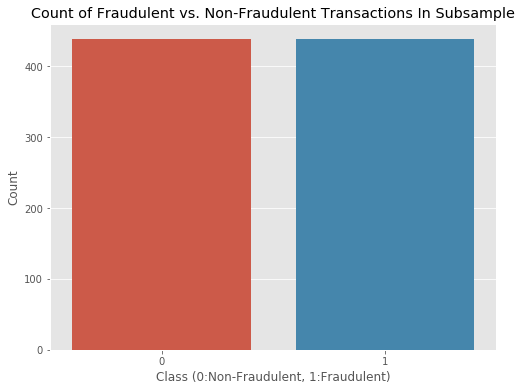

In [27]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [28]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.416
V2,0.476
V3,-0.561
V4,0.712
V5,-0.379
V6,-0.407
V7,-0.474
V8,0.066
V9,-0.560
V10,-0.630


In [29]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.561
V9,-0.560
V10,-0.630
V12,-0.687
V14,-0.752
V16,-0.604
V17,-0.570


In [30]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.712
V11,0.687
Class,1.000


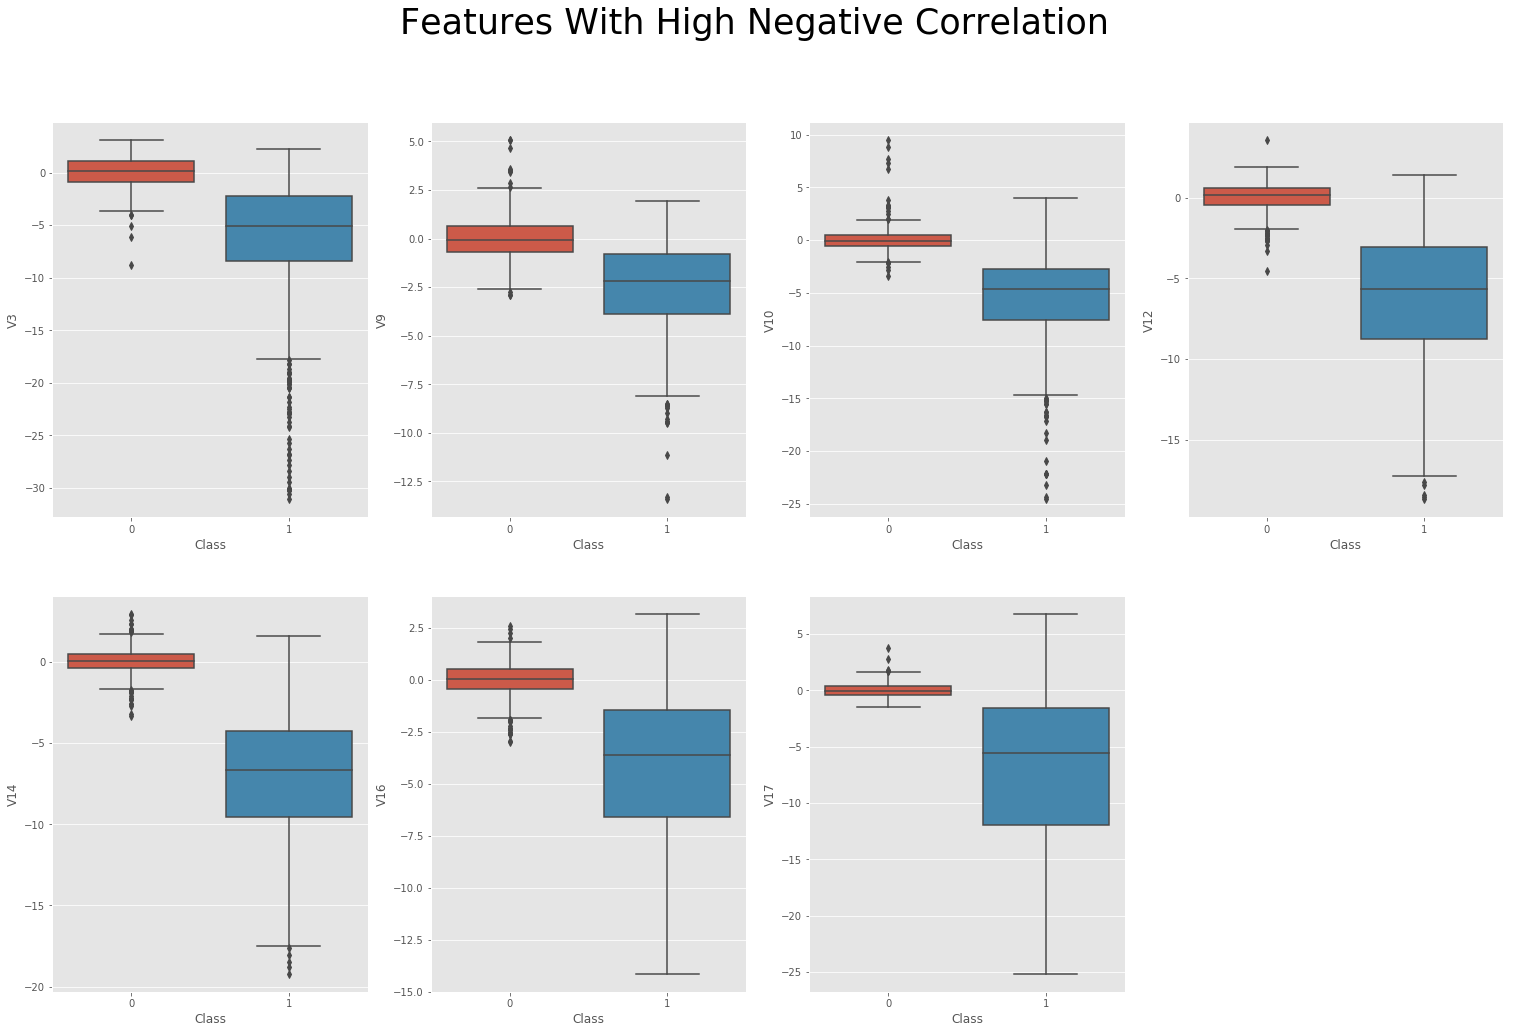

In [31]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

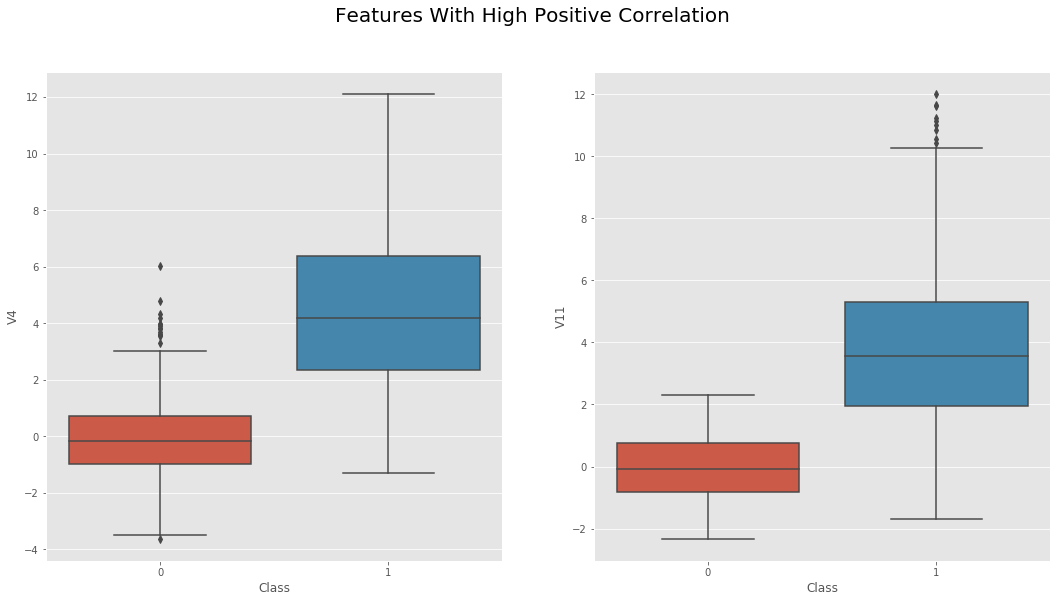

In [32]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

in my case, I decided to focus exclusively on features with a correlation of 0.5 or higher with the 
class variable for outlier removal

Box plots provide us with a good intuition of whether we need to worry about outliers as all transactions outside
of 1.5 times the IQR (Inter-Quartile Range) are usually considered to be outliers. However, removing all transactions
outside of 1.5 times the IQR would dramatically decrease our training data size, which is not very large, to begin with. 
Thus, I decided to only focus on extreme outliers outside of 2.5 times the IQR.

In [33]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [34]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.' \
      .format(len_before, len_difference, len_after))

We reduced our data size from 876 transactions by 255 transactions to 621 transactions.


# Dimensionality Reduction

Visualizing our classes would prove to be quite interesting and show us if they are clearly separable. However,
it is not possible to produce a 30-dimensional plot using all of our predictors. Instead, using a dimensionality reduction 
technique such as t-SNE, we are able to project these higher dimensional distributions into lower-dimensional visualizations.
For this project, I decided to use t-SNE

In [35]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [36]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

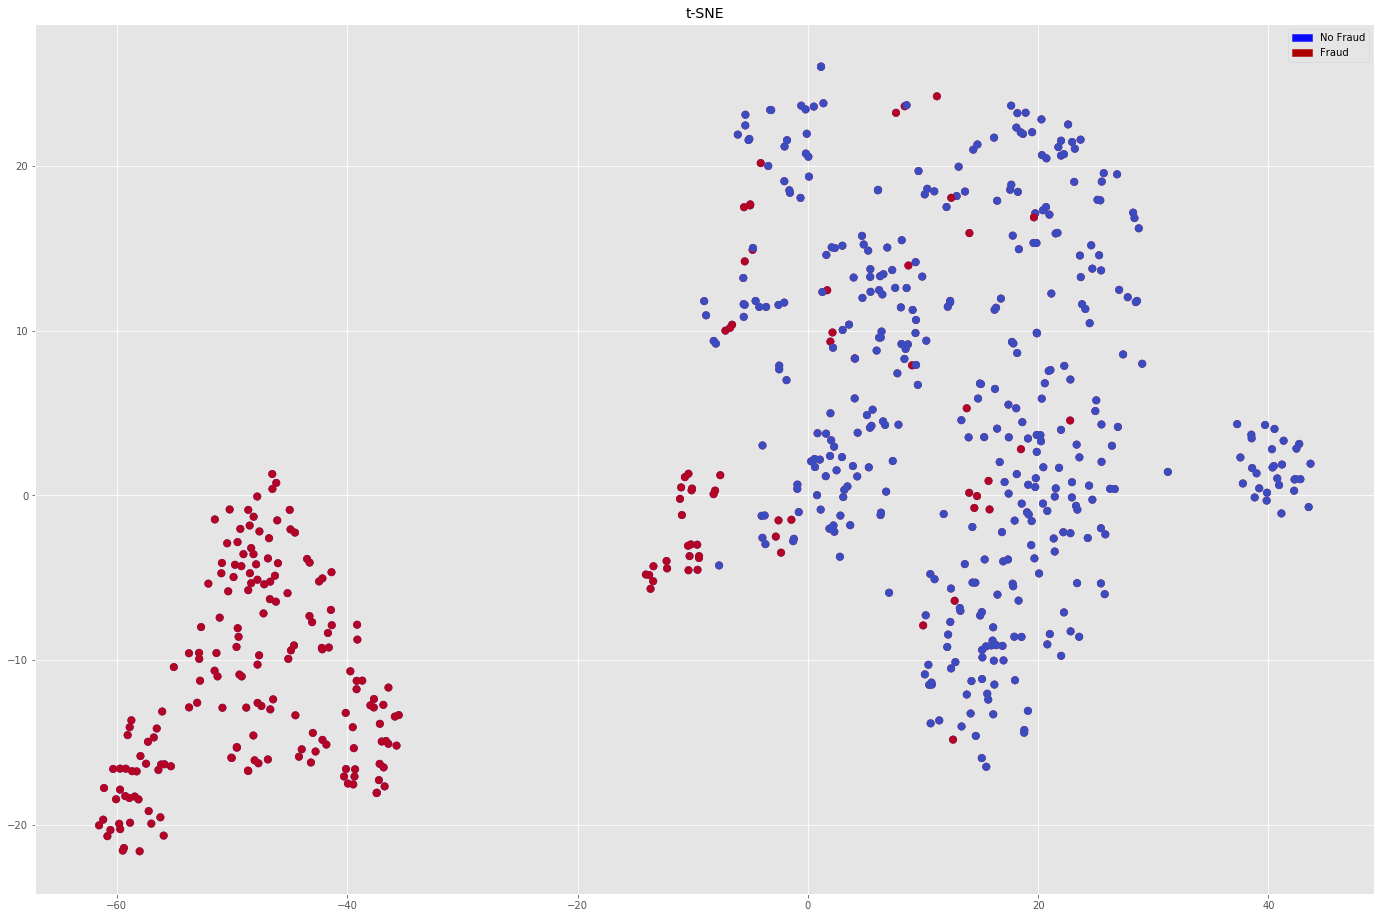

In [37]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

# Classification Algorithms

In [38]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [39]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [41]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (496, 30) (125, 30) 

Y_shapes:
 Y_train: Y_validation:
 (496,) (125,)


To get a better feeling of which algorithm would perform best on our data, let’s quickly spot-check some of the most 
popular classification algorithms:

1  Logistic Regression
2  Linear Discriminant Analysis
3  K Nearest Neighbors (KNN)
4  Classification Trees
5  Support Vector Classifier
6  Random Forest Classifier
7  XGBoost Classifier

In [43]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

In [44]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.977131 (0.016584)
LDA: 0.967925 (0.022760)
KNN: 0.964968 (0.023250)
CART: 0.907295 (0.024219)
SVM: 0.964125 (0.021005)
RF: 0.959702 (0.021585)


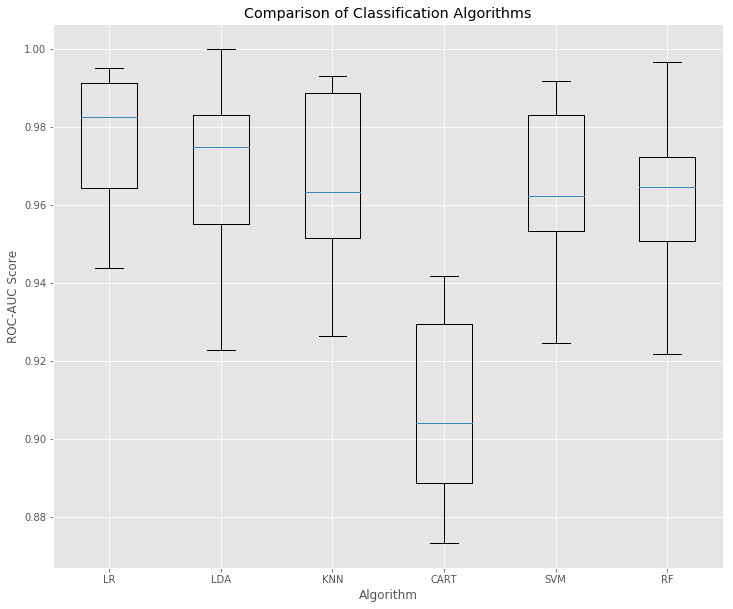

In [45]:
fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()